# Common Analysis for NBR Measurements

In [76]:
import Labber
import numpy as np
import os
import matplotlib.pyplot as plt
from fitTools.Resonator import Resonator
import logging
from resonator import reflection, see
import pandas as pd
from flux_fit import *
from utils import *

# Powersweep fits

Specify the path to the hdfl5 file.

In [77]:
fpath = r"G:\Shared drives\Labber\Data\2025\04\Data_0403\NBRL1A_no_rad_powerdweep_69mK_twpa_Off.hdf5"

In [78]:
plt.rcParams.update({'font.size':14})
path,fname = os.path.split(fpath)
path += r'\\'
figpath = 'figures\\'+fname[:-4]+'\\'
if not os.path.exists(path+'figures\\'):
    os.mkdir(path+'figures\\')
if not os.path.exists(path+figpath):
    os.mkdir(path+figpath)
lf = Labber.LogFile(path + fname)

logFileName = path + f"profile_info_{fname[:-4]}log"
logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger()
logger.addHandler(logging.FileHandler(logFileName, 'a'))
print = logger.info

nEntries = lf.getNumberOfEntries()
power = np.squeeze(np.round(lf.getData(name=lf.getStepChannels()[0]["name"]),decimals=2))

Specify the cut-off frequencies for a more accurate fit.

In [79]:
fmin, fmax=   5.7707e9, 5.7911e9

In [80]:
fits, fit_objects = process_powersweep_fits(lf, nEntries, power, path + figpath + 'fits.pdf', fmin, fmax)

NameError: name 'reflection' is not defined

In [ ]:
# save the fit results in a csv file
powersweep_df = pd.DataFrame(fits)
powersweep_df.to_csv(path+figpath+'fit_results.csv', index=False)

In [ ]:
# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the fit results (frequency vs power with error) on the first subplot
ax1.errorbar(powersweep_df['power'], powersweep_df['f'], yerr=powersweep_df['f_error'], fmt='o-', label='Frequency with error')
ax1.set_xlabel('DA Attenuation (dBm)')
ax1.set_ylabel('Frequency (GHz)')
ax1.set_title('Frequency vs Power')
ax1.legend()
ax1.grid()

# Plot the Q factors on the second subplot
ax2.plot(powersweep_df['power'], powersweep_df['Qint'], 'o-', label='Qint')
ax2.plot(powersweep_df['power'], powersweep_df['Qext'], 'o-', label='Qext')
ax2.plot(powersweep_df['power'], powersweep_df['Qtot'], 'o-', label='Qtot')
ax2.set_xlabel('DA Attenuation (dBm)')
ax2.set_ylabel('Quality Factor')
ax2.set_title('Quality Factors vs Power')
ax2.legend()
ax2.grid()

# Adjust layout and save the figure as a PDF
plt.tight_layout()
pdf_path = path + figpath + 'combined_plots.pdf'
fig.savefig(pdf_path)
plt.close(fig)

# Fluxsweep fits

Specify the path to the hdf5 file.

In [ ]:
fpath = r"G:\Shared drives\Labber\Data\2025\04\Data_0402\NBRL1A_70mK_flux_sweep.hdf5"

In [ ]:
plt.rcParams.update({'font.size':14})


path,fname = os.path.split(fpath)
path += r'\\'
figpath = 'figures\\'+fname[:-4]+'\\'
if not os.path.exists(path+'figures\\'):
    os.mkdir(path+'figures\\')
if not os.path.exists(path+figpath):
    os.mkdir(path+figpath)
lf = Labber.LogFile(path + fname)

logFileName = path + f"profile_info_{fname[:-4]}log"
logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger()
logger.addHandler(logging.FileHandler(logFileName, 'a'))
print = logger.info

nEntries = lf.getNumberOfEntries()
voltage = np.squeeze(np.round(lf.getData(name=lf.getStepChannels()[0]["name"]), decimals=6)) * 1e3 # mV


In [ ]:
fits, fit_objects = process_fluxsweep_fits(lf, nEntries, voltage, path + figpath + 'fits.pdf', span=20e6)

In [ ]:
fluxsweep_df = pd.DataFrame(fits)
fluxsweep_df.to_csv(path+figpath+'fit_results.csv', index=False)

In [ ]:
# plot the frequency and Q factors as a function of voltage
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the fit results (frequency vs voltage with error) on the first subplot
ax1.plot(fluxsweep_df['voltage'], fluxsweep_df['f'], 'o-', label='Frequency')
ax1.set_xlabel('Voltage (mV)')
ax1.set_ylabel('Frequency (GHz)')
ax1.set_title('Frequency vs Voltage')
ax1.legend()
ax1.grid()

# Plot the Q factors on the second subplot
ax2.plot(fluxsweep_df['voltage'], fluxsweep_df['Qint'], 'o-', label='Qint')
ax2.plot(fluxsweep_df['voltage'], fluxsweep_df['Qext'], 'o-', label='Qext')
ax2.plot(fluxsweep_df['voltage'], fluxsweep_df['Qtot'], 'o-', label='Qtot')
ax2.set_xlabel('Voltage (mV)')
ax2.set_ylabel('Quality Factor')
ax2.set_title('Quality Factors vs Voltage')
ax2.legend()
ax2.grid()

# Adjust layout and save the figure as a PDF
plt.tight_layout()
pdf_path = path + figpath + 'combined_plots.pdf'
fig.savefig(pdf_path)
plt.close(fig)

Now before fitting the curves, we need to reject the outliers in the frequency data.

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import logging
import pandas as pd
from flux_fit import *

In [ ]:
fluxsweep_df = pd.read_csv("data/fit_results.csv")

In [ ]:
from flux_fit import *

In [ ]:
V_start, V_end, steps = fluxsweep_df['voltage'].iloc[0], fluxsweep_df['voltage'].iloc[-1], fluxsweep_df['voltage'].iloc[1] - fluxsweep_df['voltage'].iloc[0]

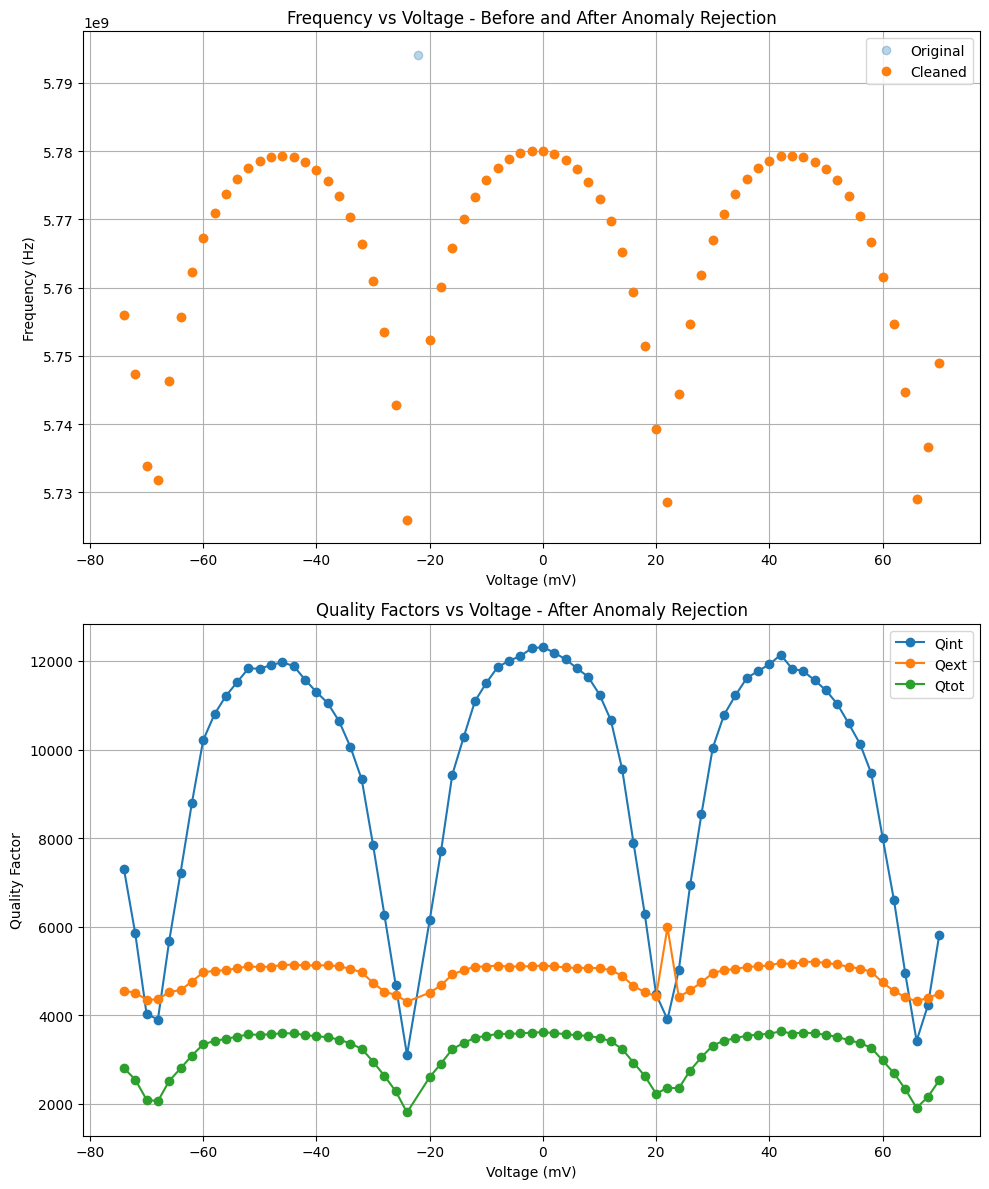

In [ ]:
# Example usage:
cleaned_df, mask, stats = reject_frequency_outliers(fluxsweep_df)

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot frequency data
ax1.plot(fluxsweep_df['voltage'], fluxsweep_df['f'], 'o', alpha=0.3, label='Original')
ax1.plot(cleaned_df['voltage'], cleaned_df['f'], 'o', label='Cleaned')
ax1.set_xlabel('Voltage (mV)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_title('Frequency vs Voltage - Before and After Anomaly Rejection')
ax1.legend()
ax1.grid(True)

# Plot Q factors
ax2.plot(cleaned_df['voltage'], cleaned_df['Qint'], 'o-', label='Qint')
ax2.plot(cleaned_df['voltage'], cleaned_df['Qext'], 'o-', label='Qext')
ax2.plot(cleaned_df['voltage'], cleaned_df['Qtot'], 'o-', label='Qtot')
ax2.set_xlabel('Voltage (mV)')
ax2.set_ylabel('Quality Factor')
ax2.set_title('Quality Factors vs Voltage - After Anomaly Rejection')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Flux Quanta Analysis

This analysis identifies and characterizes individual flux quanta in SQUID resonator measurements. The process works in three steps:

1. **Detection**: The algorithm identifies flux quanta by finding maxima in the frequency response and calculates boundaries between them using voltage midpoints.

2. **Separation**: Each flux quantum is isolated using the calculated boundaries, and the data is separated into individual periods.

3. **Fitting**: For each quantum period, the data is fit to the theoretical SQUID resonance formula:
   $$ \omega(\phi) = \omega_0 \left[1 + q_0 \frac{\sin(\pi\phi/2)\tanh^{-1}(\sin(\pi\phi/2))}{1 - \sin(\pi\phi/2)\tanh^{-1}(\sin(\pi\phi/2))}\right]^{-1/2} $$
   where $\phi$ is the normalized flux, $\omega_0$ is the base frequency, and $q_0$ is the participation ratio.

The results are visualized in two plots: an overview showing all flux quanta in different colors, and detailed subplots showing individual fits for each quantum period with both voltage and normalized flux axes.


Detected 3 flux quanta
Estimated period: 45.00 mV

Quantum 0 fit parameters:
w0 = 5.778698e+09 Hz
q0 = 0.012392
V_offset = -46.332177 mV

Quantum 1 fit parameters:
w0 = 5.779041e+09 Hz
q0 = 0.011259
V_offset = -1.337650 mV

Quantum 2 fit parameters:
w0 = 5.778595e+09 Hz
q0 = 0.012167
V_offset = 44.009869 mV


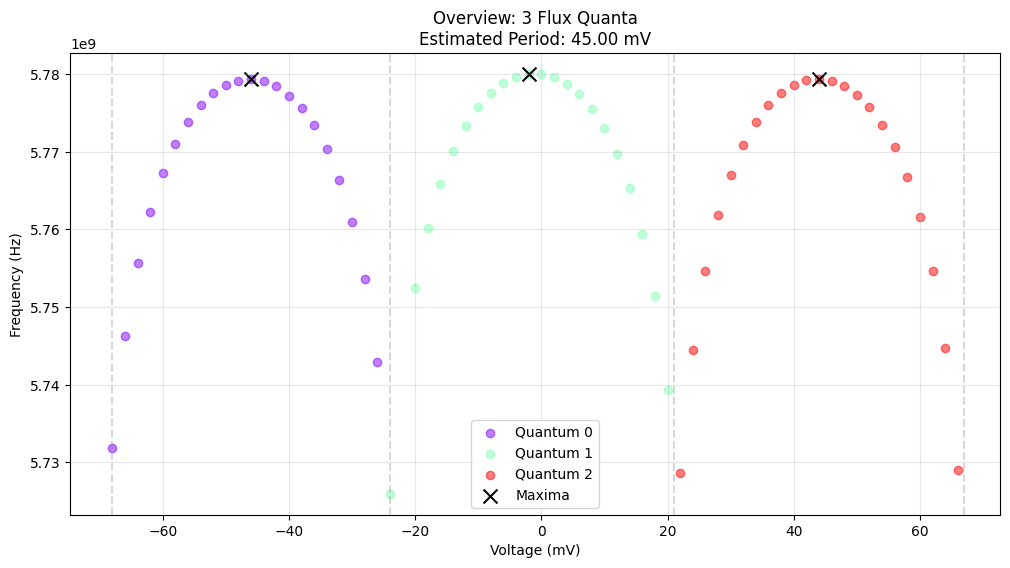

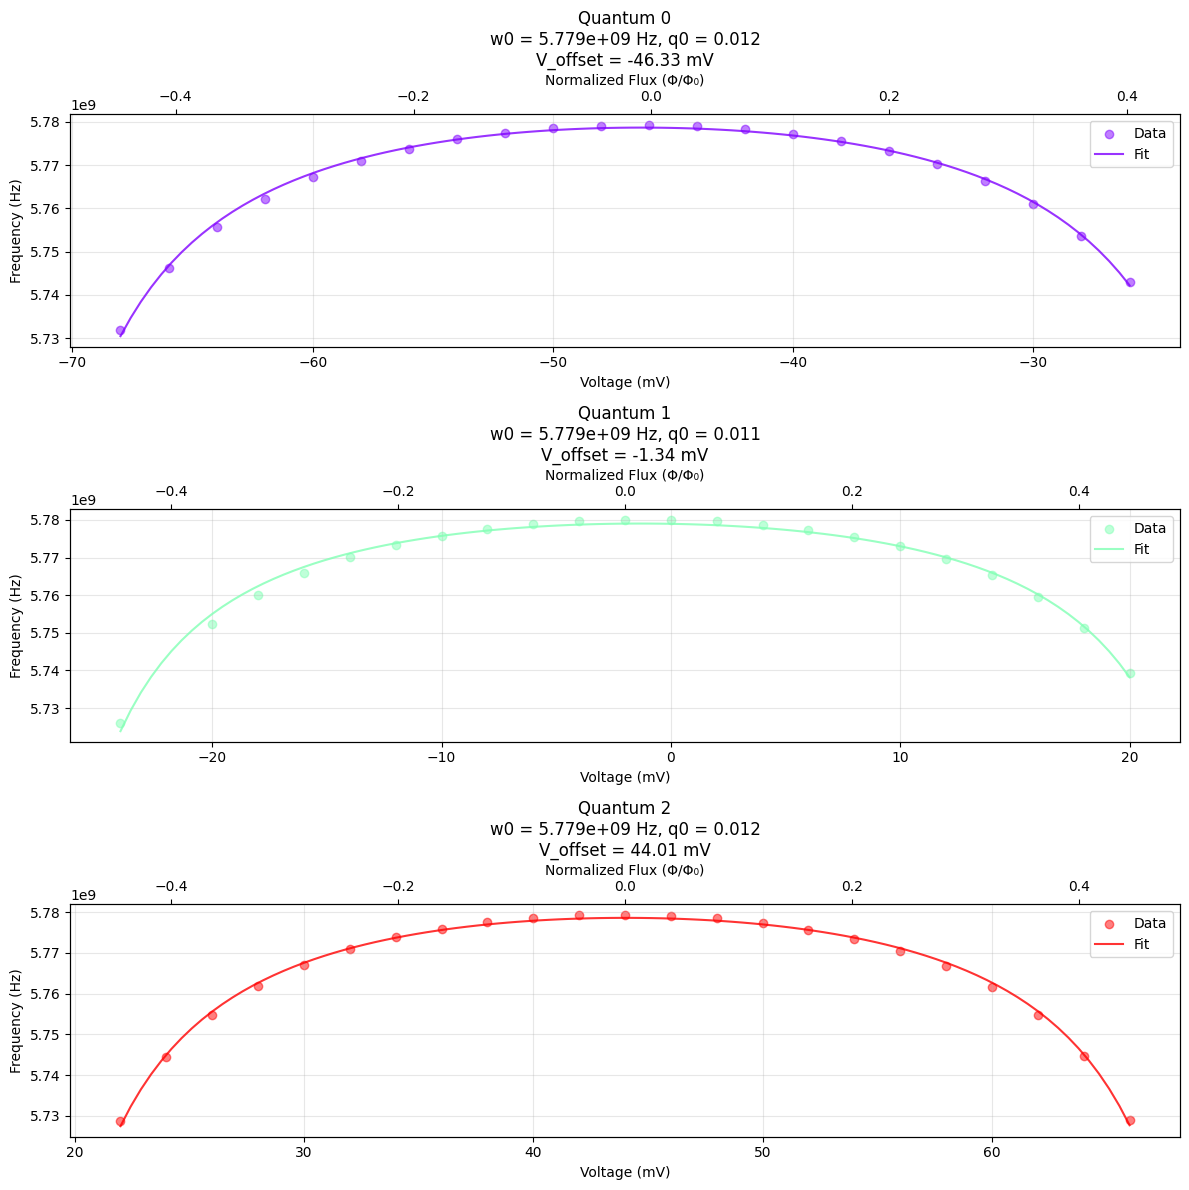

In [ ]:
flux_info = identify_flux_quanta(cleaned_df)

# Gain Check

In [ ]:
amp_OFF = r"G:\Shared drives\Labber\Data\2025\04\Data_0407\NBRL1A_TWPA_Pump_OFF.hdf5"
amp_optimal = r"G:\Shared drives\Labber\Data\2025\04\Data_0407\NBRL1A_TWPA_ON_Optimal_Params.hdf5"

In [ ]:
amp_OFF_lf = Labber.LogFile(amp_OFF)
amp_optimal_lf = Labber.LogFile(amp_optimal)

In [ ]:
frequency, S21_ref = amp_OFF_lf.getTraceXY(entry=0)
frequency, S21_optimal = amp_optimal_lf.getTraceXY(entry=0)

# get S21 in log magnitude
S21_ref = 20 * np.log10(np.abs(S21_ref))
S21_optimal = 20 * np.log10(np.abs(S21_optimal))

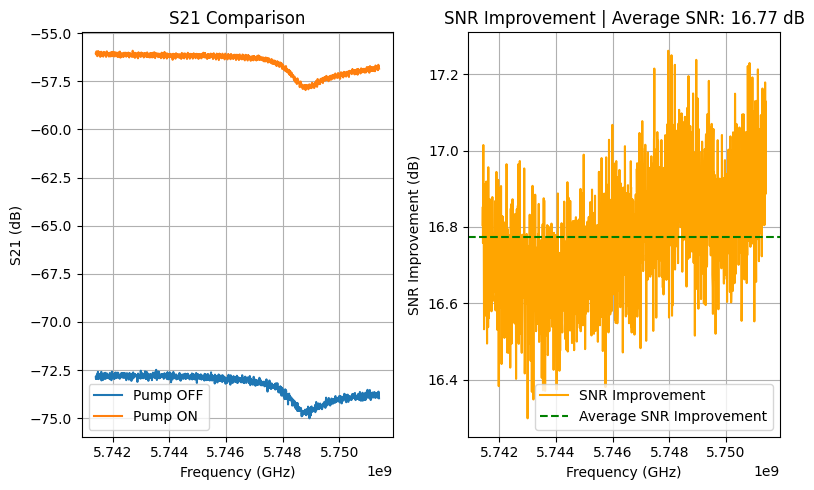

In [ ]:
# Calculate SNR improvement
SNR_improvement = S21_optimal - S21_ref

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

# Plot S21 comparison
ax1.plot(frequency, S21_ref, label='Pump OFF')
ax1.plot(frequency, S21_optimal, label='Pump ON')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('S21 (dB)')
ax1.set_title('S21 Comparison')
ax1.legend()
ax1.grid()

# Plot SNR improvement
ax2.plot(frequency, SNR_improvement, label='SNR Improvement', color='orange')
ax2.set_xlabel('Frequency (GHz)')
ax2.set_ylabel('SNR Improvement (dB)')
ax2.set_title(f'SNR Improvement | Average SNR: {np.mean(SNR_improvement):.2f} dB')
ax2.axhline(np.mean(SNR_improvement), color='green', linestyle='--', label='Average SNR Improvement')
ax2.legend()
ax2.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Comparing to sweeps over TWPA pump parameters

In [ ]:
amp_sweep = r"G:\Shared drives\Labber\Data\2025\04\Data_0407\NBRL1A_TWPA_Pump_Pump_Params_Sweep.hdf5"
amp_sweep_lf = Labber.LogFile(amp_sweep)

In [ ]:
s21_channel = amp_sweep_lf.getLogChannels()[0]["name"]

In [ ]:
# there are many entries in the log file
power_channel_name  = amp_sweep_lf.getStepChannels()[1]["name"]
freq_channel_name  = amp_sweep_lf.getStepChannels()[0]["name"]

In [ ]:
print(f"The power channel name is: {power_channel_name}")
print(f"The frequency channel name is: {freq_channel_name}")
print("\nChange the order of the channels in the code if needed ^.")

The power channel name is: TWPA  Pump - Power
The frequency channel name is: TWPA  Pump - Frequency

Change the order of the channels in the code if needed ^.


In [99]:
pump_powers = np.unique(amp_sweep_lf.getData(name=power_channel_name).flatten())
pump_freqs = np.unique(amp_sweep_lf.getData(name=freq_channel_name).flatten())

In [100]:
signals = amp_sweep_lf.getData(name=s21_channel)
log_mags = {"index": [], "S21_log_mag": [], "frequency": [], "pump_power": [], "pump_freq": []}

In [101]:
signals.shape

(318, 1601)

In [104]:
# Create an empty DataFrame
df = pd.DataFrame(columns=['pump_freq', 'pump_power', 'S21', 'snr_improvement'])

# Calculate how many complete frequency sweeps we have
n_freqs = len(pump_freqs)
complete_power_sweeps = len(signals) // n_freqs
remaining_points = len(signals) % n_freqs

# Convert S21_ref to dB if it's not already (assuming S21_ref has the same shape as each signal)
# If S21_ref is already in dB, you can skip this conversion
S21_ref_db = 20 * np.log10(np.abs(S21_ref)) if not isinstance(S21_ref, np.ndarray) or S21_ref.ndim == 0 else S21_ref

# Fill the DataFrame with the complete data
for i in range(complete_power_sweeps):
    for j in range(n_freqs):
        idx = i * n_freqs + j
        
        # Get the signal and convert to dB
        signal = signals[idx]
        signal_db = 20 * np.log10(np.abs(signal))
        
        # Calculate SNR improvement
        snr_improvement = signal_db - S21_ref_db
        
        df.loc[idx] = [pump_freqs[j], pump_powers[i], signal, snr_improvement]

# Handle the remaining partial sweep
for j in range(remaining_points):
    idx = complete_power_sweeps * n_freqs + j
    
    # Get the signal and convert to dB
    signal = signals[idx]
    signal_db = 20 * np.log10(np.abs(signal))
    
    # Calculate SNR improvement
    snr_improvement = signal_db - S21_ref_db
    
    df.loc[idx] = [pump_freqs[j], pump_powers[complete_power_sweeps], signal, snr_improvement]

# Verify the dataframe has the same number of rows as signals
print(f"DataFrame rows: {len(df)}, Signals length: {len(signals)}")

DataFrame rows: 318, Signals length: 318


In [ ]:
# Basic usage - plot all SNR improvements
plot_gain_improvement_heatmap(df, S21_ref)

Best SNR improvement of 16.83 dB at pump frequency = 6030000000.0000 GHz and pump power = 10.00 dBm


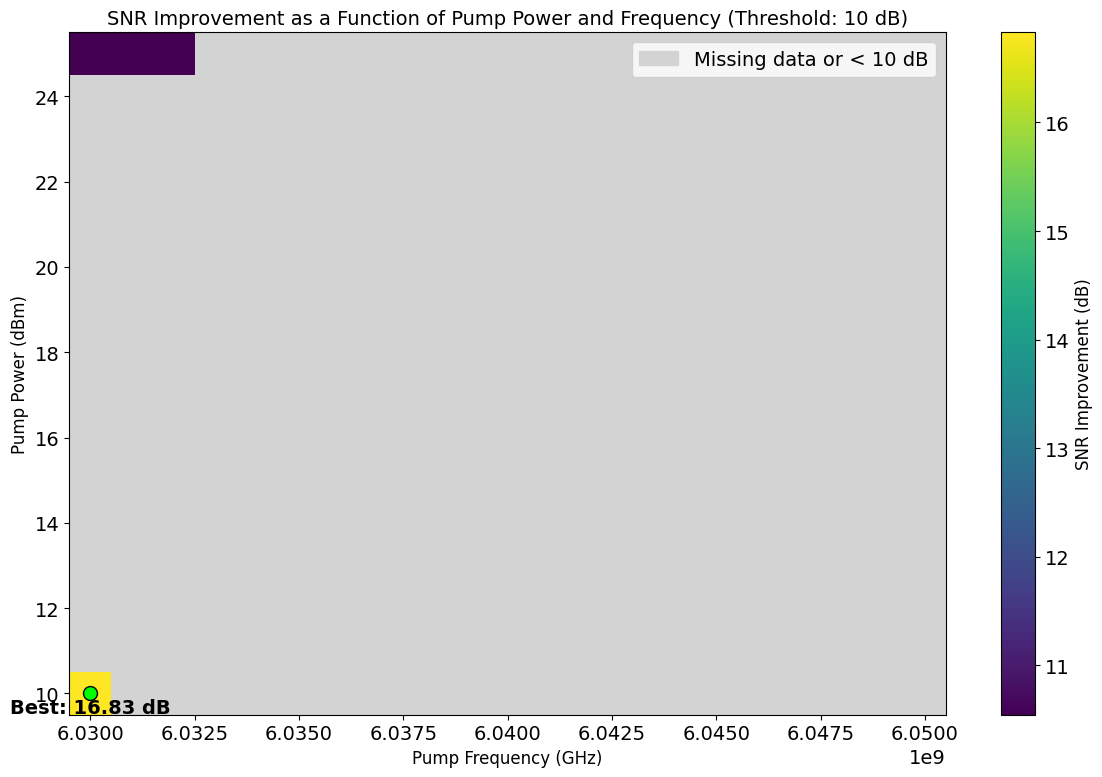

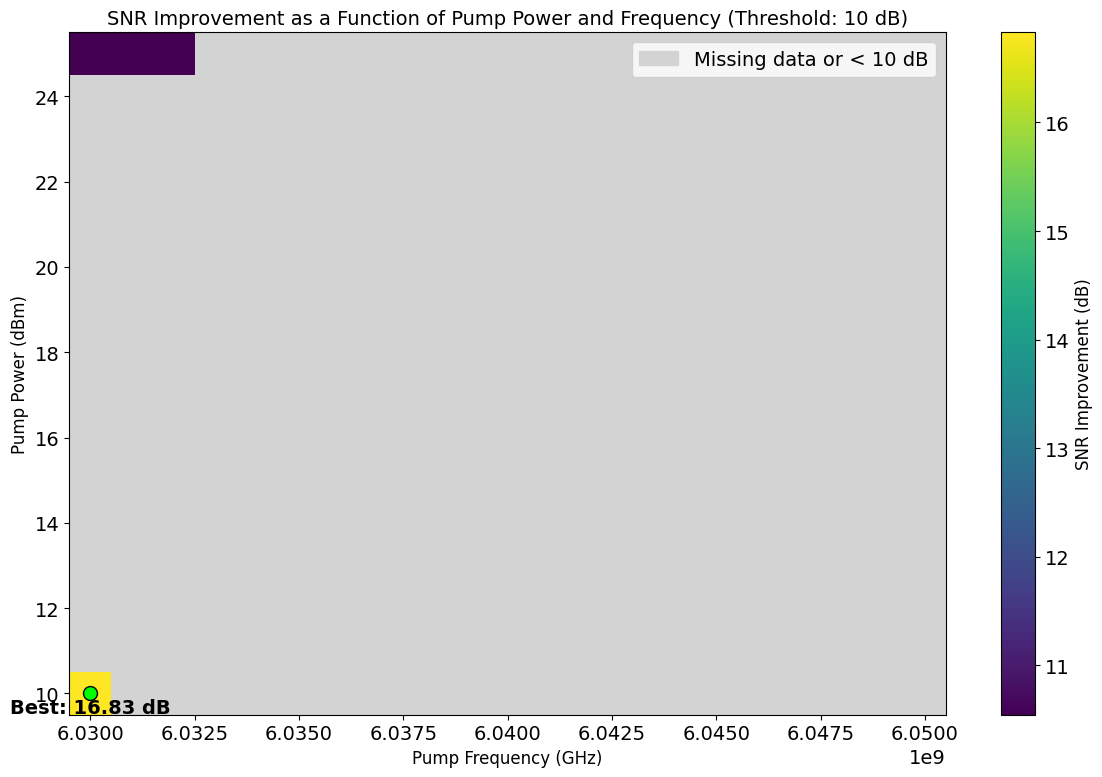

In [121]:
plot_gain_improvement_heatmap(df, S21_ref, improvement_threshold=10)